In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Loading dataset
earthquake = pd.read_csv('earthquake.csv',sep=',')


In [3]:
earthquake.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


In [4]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 86.1 KB


In [5]:
#preprocessing data

bins= (2,7,10)
group_names=['medium_risk','high_risk']
earthquake['magnitude']=pd.cut(earthquake['magnitude'],bins=bins,labels=group_names)
earthquake['magnitude'].unique()

['medium_risk', 'high_risk']
Categories (2, object): ['medium_risk' < 'high_risk']

In [6]:
label_magnitude = LabelEncoder()

In [7]:
earthquake['magnitude'] = label_magnitude.fit_transform(earthquake['magnitude'])


In [8]:
earthquake.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,1,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,1,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,1,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,0,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,0,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


In [9]:
earthquake.head(10)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,1,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,1,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,1,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,0,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,0,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960
5,1,5,4,1,802,95,2.454000,37.0,10.000,20.0196,-61.0955
6,1,4,4,1,741,136,1.179000,23.0,229.000,-17.8530,-174.9370
7,0,8,6,1,804,85,2.590000,24.0,167.404,-22.9824,-177.2080
8,1,6,6,1,733,50,2.163000,129.0,10.000,8.8894,-77.1231
9,0,3,4,1,777,98,2.812000,56.0,35.981,-23.0622,170.4560


In [10]:
earthquake['magnitude'].value_counts()

magnitude
1    697
0    303
Name: count, dtype: int64

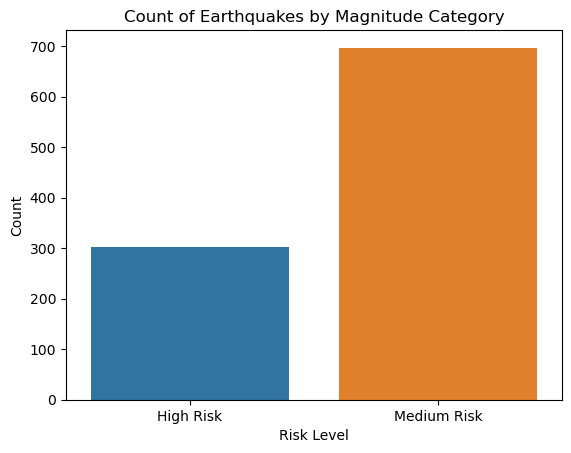

In [11]:
sns.countplot(x='magnitude', data=earthquake)

# Adding labels and title
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Count of Earthquakes by Magnitude Category')

# Customize x-axis labels
plt.xticks(ticks=[0, 1], labels=['High Risk', 'Medium Risk'])

# Show the plot
plt.show()


In [12]:
X = earthquake.drop('magnitude', axis = 1)
y = earthquake['magnitude']

In [13]:
#Train and Test splitting of data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
X_train[:10]

array([[ 1.60228399,  2.07998794, -0.69191262,  6.89339567, -0.31270571,
         0.41325736,  0.48178166, -0.43162369,  1.22847768, -0.11818066],
       [-0.19089931,  0.67577667, -0.69191262, -0.31204926,  0.4830849 ,
        -0.55032825, -0.11079932, -0.43104906, -0.254833  ,  0.72914976],
       [-1.08749095, -0.02632896, -0.69191262, -0.4591674 ,  1.05992783,
        -0.55032825,  0.55851877, -0.29313957, -0.063388  ,  0.3805675 ],
       [ 0.40682846,  0.67577667, -0.69191262, -0.22845941,  0.77782217,
        -0.55032825, -0.24295767, -0.49234217, -0.5038019 ,  0.90629673],
       [-1.08749095, -0.02632896, -0.69191262, -0.59625475,  0.10834752,
        -0.55032825, -0.88243355, -0.31612449, -0.62638395,  0.98370649],
       [ 1.00455623,  1.37788231, -0.69191262,  0.13264873,  1.94413963,
        -0.55032825, -0.15343105, -0.50919777,  1.29737075,  0.7660756 ],
       [ 1.00455623,  0.67577667,  1.44526921,  0.26973608, -0.80954853,
        -0.3228638 , -0.20032594, -0.49234217

# Random Forest Classifier

In [17]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train, )
pred_rfc = rfc.predict(X_test)


In [18]:
#Let's see how our model performed
pred_rfc[:20]


array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [19]:
#Checking model performance

pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.83      0.95      0.88        56
           1       0.98      0.92      0.95       144

    accuracy                           0.93       200
   macro avg       0.90      0.94      0.92       200
weighted avg       0.94      0.93      0.93       200



Category 0 high risk:
Precision (accuracy of positive predictions): 83%
Recall (ability to capture all actual positives): 95%
F1-score (balance between precision and recall): 88%
Support (number of actual instances): 56
Category 1 medium risk:
Precision (accuracy of positive predictions): 98%
Recall (ability to capture all actual positives): 92%
F1-score (balance between precision and recall): 95%
Support (number of actual instances): 144
Overall Metrics:
Accuracy: 93%
Macro Avg (average across both classes): Precision 90%, Recall 94%, F1-score 92%
Weighted Avg (weighted by the number of instances): Precision 94%, Recall 93%, F1-score 93%
Summary:

The model has high precision for both classes, indicating a low rate of false positives.
The recall for class 1 is slightly lower compared to the previous report (92% vs. 95%), indicating that the model may miss a few positive instances.
The F1-score, which balances precision and recall, is high for both classes.
The overall accuracy is 95%, suggesting the model's ability to make correct predictions across both classes.
The macro and weighted averages of precision, recall, and F1-score also indicate strong overall performance.


In [20]:
#Confusion matrix for the random forest classification

print(confusion_matrix(y_test, pred_rfc))


[[ 53   3]
 [ 11 133]]


True Negatives (TN): 53
False Positives (FP): 3
False Negatives (FN): 11
True Positives (TP): 133

These metrics provide a more detailed understanding of the model's performance, particularly in terms of correctly identifying positive instances (precision and recall) and balancing between the two (F1-score).

Overall, based on the provided values, the model seems to be performing well with high precision, recall, and F1-score.


In [21]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)

cm

0.93

An accuracy score of 0.93 (or 93%) means Random Forest Classifier model correctly predicted the labels for approximately 93% of the instances in the test set. This is a measure of overall correctness 

In [22]:
earthquake.head(10)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,1,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,1,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,1,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,0,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,0,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960
5,1,5,4,1,802,95,2.454000,37.0,10.000,20.0196,-61.0955
6,1,4,4,1,741,136,1.179000,23.0,229.000,-17.8530,-174.9370
7,0,8,6,1,804,85,2.590000,24.0,167.404,-22.9824,-177.2080
8,1,6,6,1,733,50,2.163000,129.0,10.000,8.8894,-77.1231
9,0,3,4,1,777,98,2.812000,56.0,35.981,-23.0622,170.4560


In [23]:
Xnew = [[6, 6, 1, 733, 50, 2.163, 129.0, 10.0, 8.8894, -77.1231]]

Xnew = sc.transform(Xnew)

ynew = rfc.predict(Xnew)

print('The risk of the earthquake with given parameters is:') 
print(ynew)

The risk of the earthquake with given parameters is:
[1]


C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Based on the result "1," the trained RandomForestClassifier has predicted that the given input data point falls into the medium risk category.